## Schwarchild like solution
Idea is to (likely numerically?) figure out a solution with Katz like energy - with energy counted as mass.


In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


#I was looking for a horizon, there is none :),  

so i looked for rbar is at 1.15*Mass in isotropic coordinates. Note how the convergence is to 0.15 - the slope is linear 

Code is removed for this, but it shows that convergence is assured at q million points...

## more accurate way, rbar = rbar + dr/2 - use halfway along dr
| Points   | solution|
| -------- | ------- |
| 20000     | 0.13509986497166324    |
| 200000 | 0.15009985040898566     |
| 2000000    | 0.15134985246630017    |
| 10000000    | 0.1514798589950413    |


## less accurate way, rbar = rbar - use starting point of dr, so expect it to be worse.
| Points   | solution|
| -------- | ------- |
| 20000     | 0.10009989997166319    |
| 200000 | 0.1480998524089857     |
| 2000000    | 0.1511998526163002    |
| 10000000    | 0.15144985902504127    |



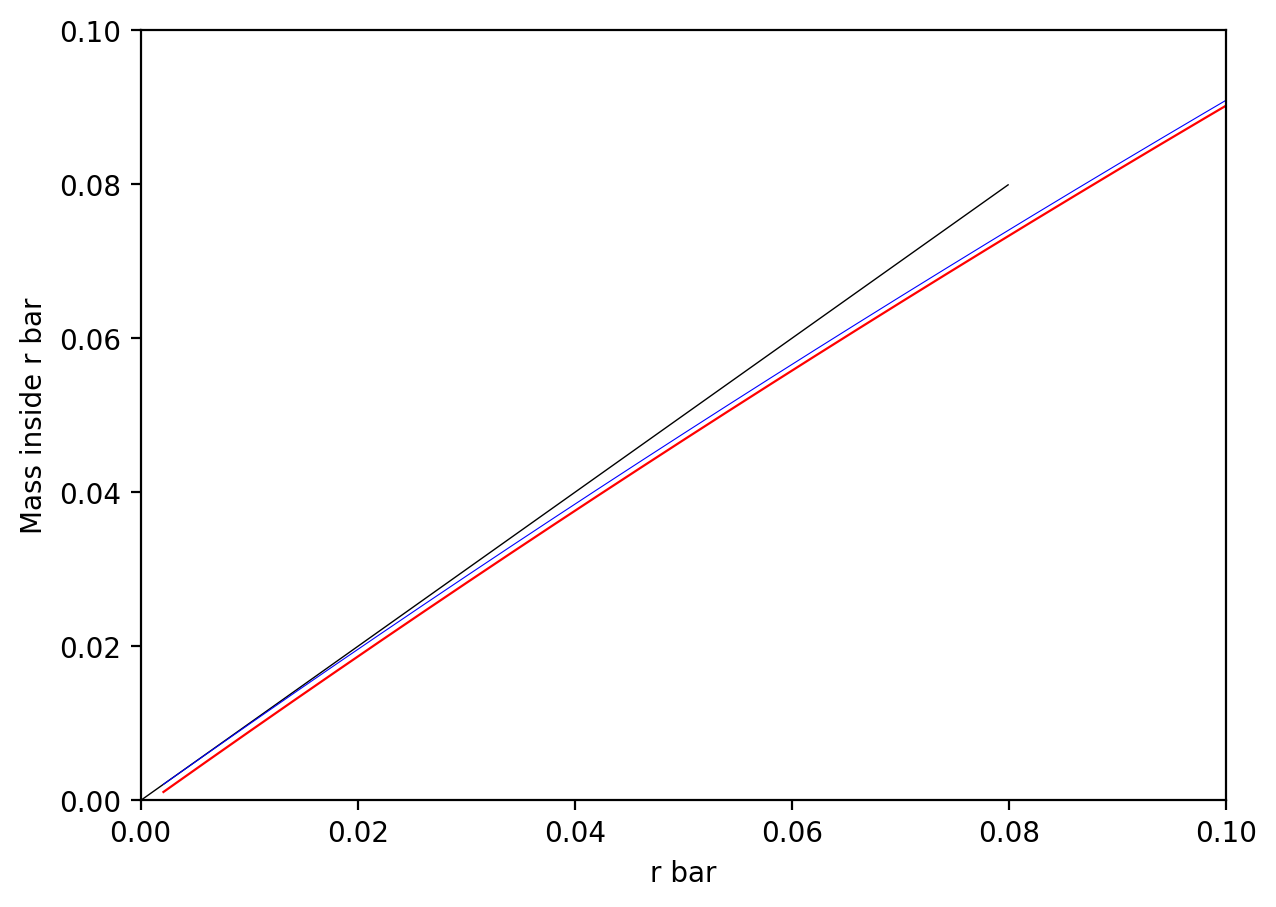

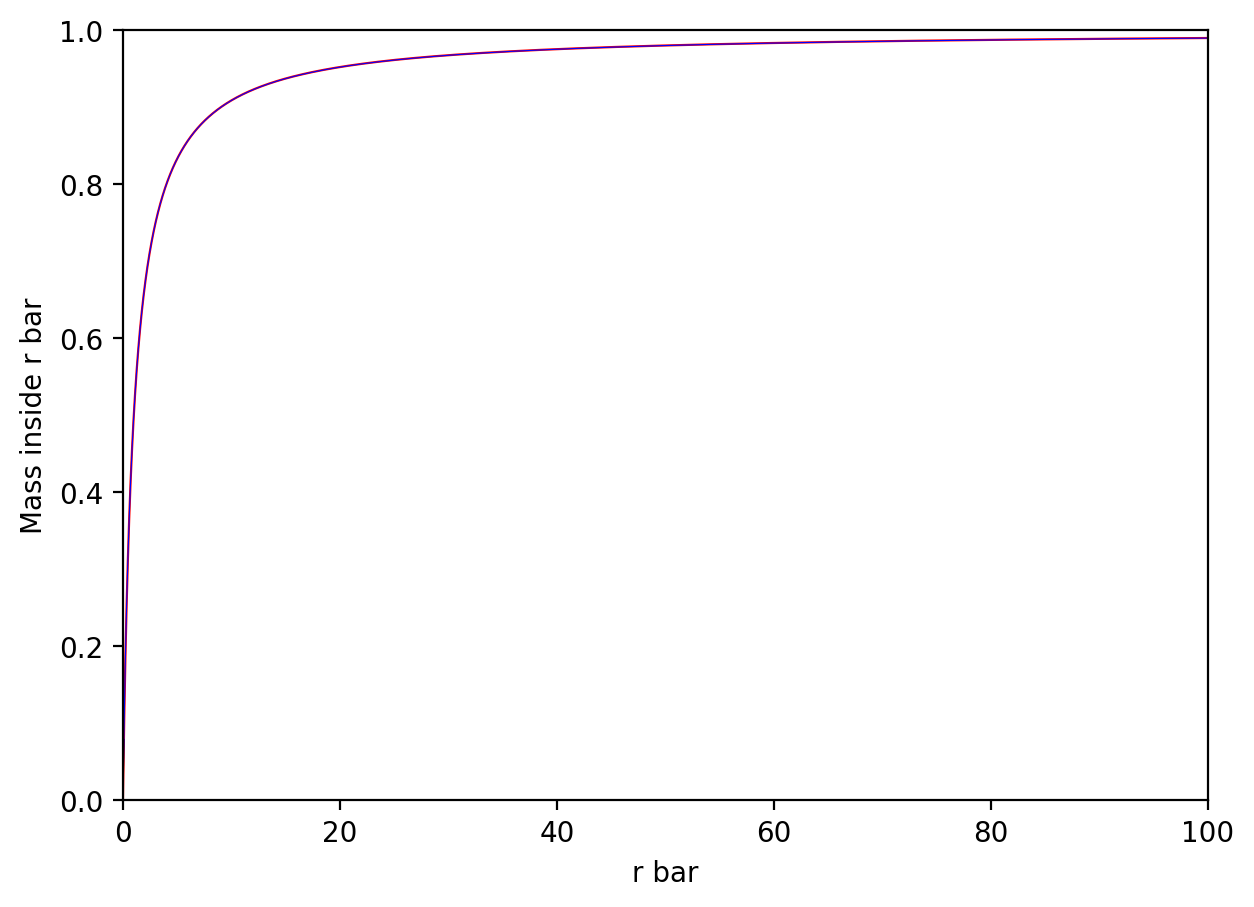

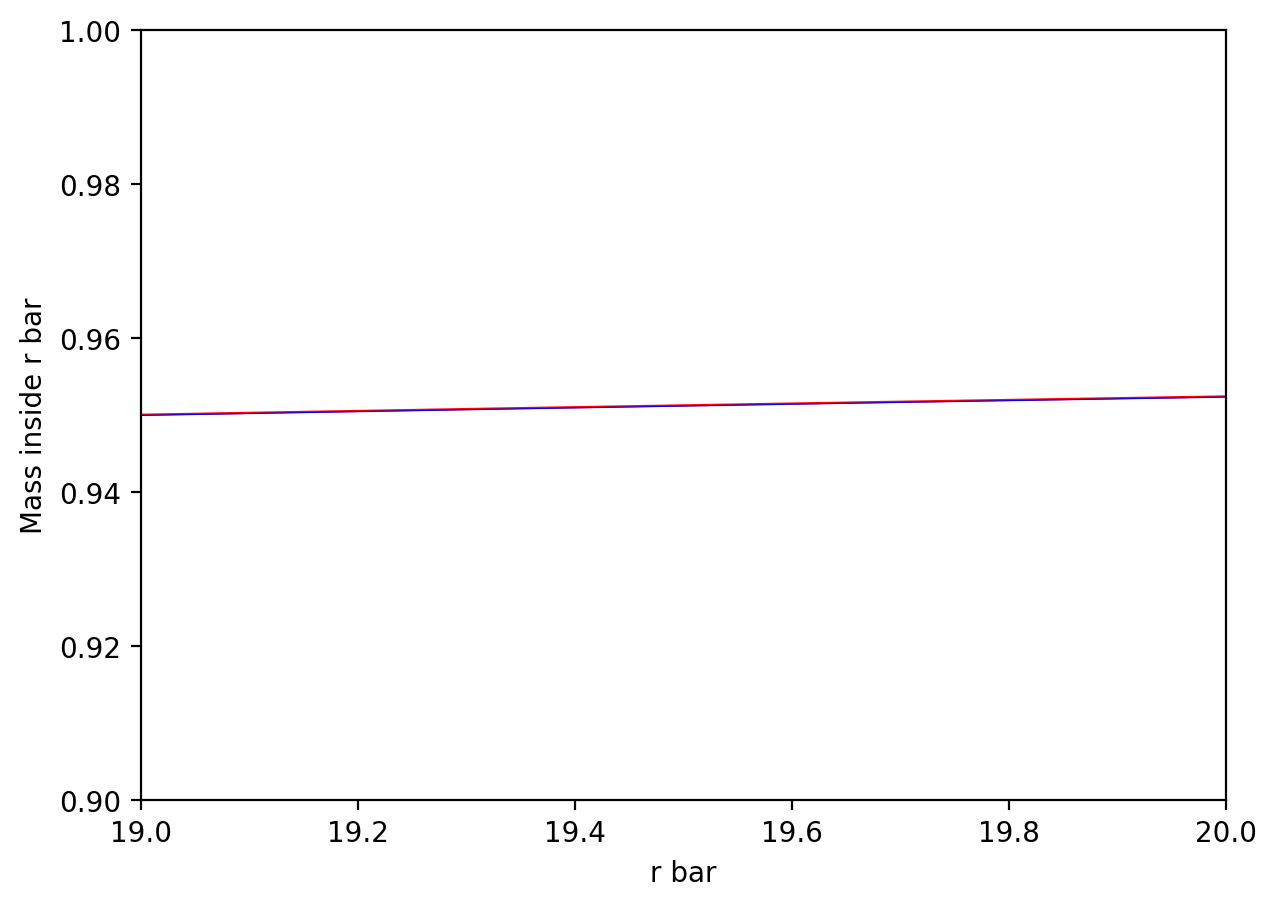

In [18]:
numPoints = 5000000
outerR = 2000.0
innerR = 0.0001

# Next, we will create an empty list that we will use to store the results
# of out calculation.
massInside = []
rBars = []
fits = []
# We can now use our results list within a for loop and append values
# to list as the loop iterates.
M = 1
k = 1
# prev is mass inside r, it starts with all the mass inside r at 'infinity...'
prev = M
rBar = outerR
dr = (outerR - innerR)/numPoints
#look for the horizon. rBar is M/2 at the horizon
for count in range(numPoints):
    #katz is mass from rBar to rBar + dr
    midR = rBar + dr/2 # use midpoint... - more accurate as I tested...
    katz = dr*k*prev*prev/(midR*midR)
    massInsideRbar = prev - katz
    massInside.append(massInsideRbar)
    rBars.append(rBar)
    prev = massInsideRbar
    # find a good fit
    # This is the function.... - you can see if you do about 10 million points and range of 3000
    y = M - M/(1 + rBar)
    fits.append(y)
    rBar -= dr

#print('rBars:',rBars)
#print('massInside:',massInside)

#define my plot
def my_plot(rBars, massInside, fits):
    fig = plt.figure(figsize=(7, 5), dpi=200)
    plt.plot(rBars, massInside, marker="none", color='red', lw=0.8)
    plt.xlabel('r bar');
    plt.ylabel('Mass inside r bar');
    #plt.vlines(horizonR, ymin=0, ymax=1)

    # Takes list of lines, where each line is a sequence of coordinates
    l1 = [(0, 0), (0.08, 0.08)]
    lc = matplotlib.collections.LineCollection([l1], color=["k"], lw=0.5)

    plt.gca().add_collection(lc)

    plt.plot(rBars,fits, marker="none", color='blue', lw=0.4)


# # origin zoom - also see slope == 1 
my_plot(rBars, massInside, fits)
plt.axis((0, 0.1, 0.0, 0.1));
plt.show()

# Full plot 
my_plot(rBars, massInside, fits)
plt.axis((0, 100, 0.0, 1));
plt.show()

# Middle - shows error 
my_plot(rBars, massInside, fits)
plt.axis((19, 20, 0.9, 1.0));
plt.show()




# observations. 

The slope is 1 near the origin. r == 0 is 'zero mass' - no singularity, no horizon...

Remember, the slope is 1 in isotropic coordinates..

I am looking for this online....